In [114]:
# Import module for data manipulation
import pandas as pd
# Import module for linear algebra
import numpy as np
# Import module for data visualization
import matplotlib.pyplot as plt
import plotly.express as px
# Import module for k-means
from sklearn.cluster import KMeans, DBSCAN
# Ignore warnings
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)
# Format scientific notation from Pandas
pd.set_option('display.max_columns', None)

# prepocessing sklearn
from sklearn.compose import make_column_transformer,make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

#Pour la localisation du coude
from kneed import KneeLocator, DataGenerator as dg

In [115]:
df = pd.read_csv('data.csv')
df['payment_installments']=df['payment_installments'].astype('int64')
df= df.drop(['customer_city','customer_state','customer_zip_code_prefix','seller_city','seller_state','customer_unique_id.1','order_purchase_timestamp','customer_unique_id'], axis=1)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91479 entries, 0 to 91478
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   payment_type          91479 non-null  object 
 1   product_category      91479 non-null  object 
 2   payment_installments  91479 non-null  int64  
 3   order_item_id         91479 non-null  int64  
 4   product_id            91479 non-null  int64  
 5   seller_id             91479 non-null  int64  
 6   payment_value         91479 non-null  float64
 7   review_score          91479 non-null  float64
 8   price                 91479 non-null  float64
 9   freight_value         91479 non-null  float64
 10  recency               91479 non-null  int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 7.7+ MB


payment_type     product_category  payment_installments  order_item_id  \
0      credit_card                 Home                     8              1   
1      credit_card        Health_Beauty                     1              1   
2      credit_card      Office_Supplies                     8              1   
3      credit_card           Technology                     4              1   
4      credit_card           Technology                     6              1   
...            ...                  ...                   ...            ...   
91474  credit_card        Health_Beauty                    10              2   
91475  credit_card                 Baby                     1              1   
91476  credit_card           Automotive                     1              1   
91477  credit_card  Fashion_Accessories                     5              1   
91478  credit_card        Health_Beauty                     4              1   

       product_id  seller_id  payment_value  review_score   price  \
0               1          1         141.90           5.0  129.90   
1               1          1          27.19           4.0   18.90   
2               1          1          86.22           3.0   69.00   
3               1          1          43.62           4.0   25.99   
4               1          1         196.89           5.0  180.00   
...           ...        ...            ...           ...     ...   
91474           2          2        4134.84           5.0  785.00   
91475           1          1          84.58           4.0   64.89   
91476           1          1         112.46           5.0   89.90   
91477           1          1         133.69           5.0  115.00   
91478           1          1          71.56           5.0   56.99   

       freight_value  recency  
0              12.00      112  
1               8.29      115  
2              17.22      538  
3              17.63      322  
4              16.89      289  
...              ...      ...  
91474         248.71      448  
91475          19.69      263  
91476          22.56      569  
91477          18.69      120  
91478          14.57      485  

[91479 rows x 11 columns]

In [116]:
transformer = make_column_transformer(
    (OneHotEncoder(sparse=False),make_column_selector(dtype_exclude=np.number)),
    (StandardScaler(),make_column_selector(dtype_include=np.number))
    )

In [117]:
df = transformer.fit_transform(df)
df=pd.DataFrame(df)
df

0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
0      0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1      0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2      0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3      0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4      0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
91474  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
91475  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
91476  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
91477  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
91478  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

        14   15   16   17   18   19   20   21   22   23        24        25  \
0      0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.912748 -0.281338   
1      1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 -0.699468 -0.281338   
2      0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.912748 -0.281338   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.420053 -0.281338   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.166401 -0.281338   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...       ...   
91474  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  2.659095  0.903038   
91475  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 -0.699468 -0.281338   
91476  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 -0.699468 -0.281338   
91477  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.793227 -0.281338   
91478  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.420053 -0.281338   

             26        27        28        29        30         31        32  
0     -0.281338 -0.281338 -0.111559  0.660828  0.022318  -0.522037 -0.831044  
1     -0.281338 -0.281338 -0.293267 -0.120862 -0.565790  -0.757863 -0.811419  
2     -0.281338 -0.281338 -0.199760 -0.902552 -0.300347  -0.190228  1.955725  
3     -0.281338 -0.281338 -0.267241 -0.120862 -0.528225  -0.164166  0.542716  
4     -0.281338 -0.281338 -0.024451  0.660828  0.287761  -0.211204  0.326839  
...         ...       ...       ...       ...       ...        ...       ...  
91474  0.903038  0.903038  6.213532  0.660828  3.493210  14.524418  1.366971  
91475 -0.281338 -0.281338 -0.202358 -0.120862 -0.322122  -0.033223  0.156755  
91476 -0.281338 -0.281338 -0.158194  0.660828 -0.189613   0.149209  2.158518  
91477 -0.281338 -0.281338 -0.124564  0.660828 -0.056626  -0.096787 -0.778710  
91478 -0.281338 -0.281338 -0.222982  0.660828 -0.363979  -0.358675  1.609015  

[91479 rows x 33 columns]

In [118]:
# Choose optimal K using Elbow method
inertia = []
for cluster in range(1, 10):
        kmeans = KMeans( n_clusters = cluster)
        kmeans.fit(df)
        inertia.append(kmeans.inertia_)
        print('Cluster initiation: {}'.format(cluster))



Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9


Text(0, 0.5, 'Cout du modèle (inertia)')

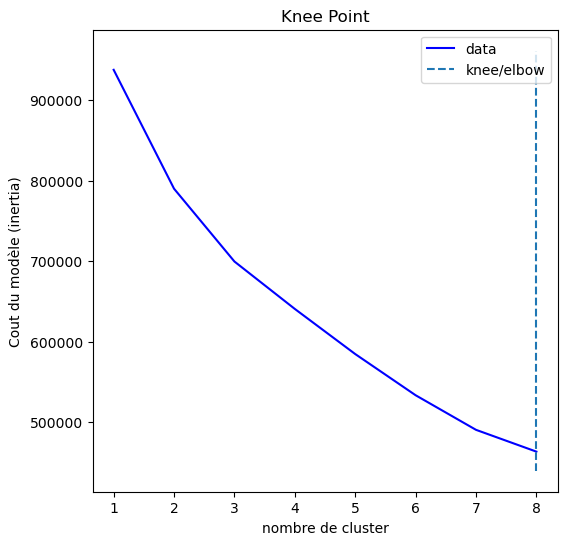

In [119]:
x,y = range(1,9),inertia[:-1]
kl = KneeLocator(x,y, curve='convex')
kl.plot_knee()
plt.xlabel('nombre de cluster')
plt.ylabel('Cout du modèle (inertia)')

In [120]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(df)
kmeans.predict(df)

array([1, 3, 1, ..., 6, 3, 6], dtype=int32)

In [121]:
df = pd.read_csv('data.csv')
df.rename(columns={"order_item_id": "orders", "product_id": "products", "seller_id":'sellers'}, inplace=True)
df= df.drop(['customer_city','customer_state','customer_zip_code_prefix','seller_city','seller_state','order_purchase_timestamp','customer_unique_id','customer_unique_id.1'], axis=1)
df

payment_type     product_category  payment_installments  orders  \
0      credit_card                 Home                   8.0       1   
1      credit_card        Health_Beauty                   1.0       1   
2      credit_card      Office_Supplies                   8.0       1   
3      credit_card           Technology                   4.0       1   
4      credit_card           Technology                   6.0       1   
...            ...                  ...                   ...     ...   
91474  credit_card        Health_Beauty                  10.0       2   
91475  credit_card                 Baby                   1.0       1   
91476  credit_card           Automotive                   1.0       1   
91477  credit_card  Fashion_Accessories                   5.0       1   
91478  credit_card        Health_Beauty                   4.0       1   

       products  sellers  payment_value  review_score   price  freight_value  \
0             1        1         141.90           5.0  129.90          12.00   
1             1        1          27.19           4.0   18.90           8.29   
2             1        1          86.22           3.0   69.00          17.22   
3             1        1          43.62           4.0   25.99          17.63   
4             1        1         196.89           5.0  180.00          16.89   
...         ...      ...            ...           ...     ...            ...   
91474         2        2        4134.84           5.0  785.00         248.71   
91475         1        1          84.58           4.0   64.89          19.69   
91476         1        1         112.46           5.0   89.90          22.56   
91477         1        1         133.69           5.0  115.00          18.69   
91478         1        1          71.56           5.0   56.99          14.57   

       recency  
0          112  
1          115  
2          538  
3          322  
4          289  
...        ...  
91474      448  
91475      263  
91476      569  
91477      120  
91478      485  

[91479 rows x 11 columns]

In [122]:
df['cluster_labels']=pd.Series(kmeans.labels_)
df.groupby('cluster_labels').describe()

payment_installments                                           \
                              count      mean       std  min  25%  50%   75%   
cluster_labels                                                                 
0                            2095.0  5.961814  3.792678  1.0  2.0  6.0  10.0   
1                           12123.0  7.929390  2.086196  2.0  6.0  8.0  10.0   
2                           13056.0  2.381587  1.898798  1.0  1.0  1.0   3.0   
3                           34998.0  1.773158  1.175102  0.0  1.0  1.0   2.0   
4                             127.0  2.685039  3.655179  1.0  1.0  1.0   1.0   
5                            3570.0  3.163866  3.094257  1.0  1.0  1.0   5.0   
6                           25510.0  1.941984  1.327127  1.0  1.0  1.0   3.0   

                       orders                                              \
                 max    count       mean       std  min   25%   50%   75%   
cluster_labels                                                              
0               24.0   2095.0   1.099284  0.319196  1.0   1.0   1.0   1.0   
1               24.0  12123.0   1.103852  0.306161  1.0   1.0   1.0   1.0   
2               10.0  13056.0   1.185738  0.388910  1.0   1.0   1.0   1.0   
3                6.0  34998.0   1.093863  0.291642  1.0   1.0   1.0   1.0   
4               24.0    127.0  13.307087  7.710549  4.0  10.0  12.0  14.0   
5               18.0   3570.0   3.831933  1.174965  3.0   3.0   3.0   4.0   
6                7.0  25510.0   1.112897  0.316473  1.0   1.0   1.0   1.0   

                     products                                              \
                 max    count       mean       std  min   25%   50%   75%   
cluster_labels                                                              
0                3.0   2095.0   1.099284  0.319196  1.0   1.0   1.0   1.0   
1                3.0  12123.0   1.103852  0.306161  1.0   1.0   1.0   1.0   
2                2.0  13056.0   1.185738  0.388910  1.0   1.0   1.0   1.0   
3                2.0  34998.0   1.093863  0.291642  1.0   1.0   1.0   1.0   
4               75.0    127.0  13.307087  7.710549  4.0  10.0  12.0  14.0   
5                9.0   3570.0   3.831933  1.174965  3.0   3.0   3.0   4.0   
6                2.0  25510.0   1.112897  0.316473  1.0   1.0   1.0   1.0   

                      sellers                                              \
                 max    count       mean       std  min   25%   50%   75%   
cluster_labels                                                              
0                3.0   2095.0   1.099284  0.319196  1.0   1.0   1.0   1.0   
1                3.0  12123.0   1.103852  0.306161  1.0   1.0   1.0   1.0   
2                2.0  13056.0   1.185738  0.388910  1.0   1.0   1.0   1.0   
3                2.0  34998.0   1.093863  0.291642  1.0   1.0   1.0   1.0   
4               75.0    127.0  13.307087  7.710549  4.0  10.0  12.0  14.0   
5                9.0   3570.0   3.831933  1.174965  3.0   3.0   3.0   4.0   
6                2.0  25510.0   1.112897  0.316473  1.0   1.0   1.0   1.0   

                     payment_value                                     \
                 max         count         mean           std     min   
cluster_labels                                                          
0                3.0        2095.0  1153.541084    885.028355  137.43   
1                3.0       12123.0   269.119562    214.191375   37.58   
2                2.0       13056.0   160.848834    158.261490   13.78   
3                2.0       34998.0   123.721560    114.213026    9.59   
4               75.0         127.0  6850.531417  12264.714364   40.85   
5                9.0        3570.0   913.215838   1113.023368   17.38   
6                2.0       25510.0   124.808875    117.468738   10.07   

                                                        review_score  \
                     25%       50%       75%        max        count   
cluster_labels            

In [123]:
pca_pipe = make_pipeline(transformer, PCA(n_components=2))

In [124]:
pca_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5da8c6b3a0>),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5da8c6baf0>)])),
                ('pca', PCA(n_components=2))])

In [125]:
df_pca=pca_pipe.fit_transform(df)

fig = px.scatter(df_pca, x=0, y=1, color=df['cluster_labels'])
fig.show()

In [126]:
# pca_pipe = make_pipeline(transformer, PCA(n_components=3))
# df_pca=pca_pipe.fit_transform(df)


# fig = px.scatter_3d(
#     df_pca, x=0, y=1, z=2, color=df['cluster_labels'],
#     title='Clusters en 3D',
#     labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
# )
# fig.show()

# fig = px.scatter_3d(
#     df_pca, x=0, y=1, z=2, color=df['cluster_labels'],
#     title='Clusters en 3D',
#     labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
# )
# fig.show()